### Hello! Gonna try to use LODES data. Idk anything. We'll see.


###### Find relevant links to this project below 

Find the data here -> https://lehd.ces.census.gov/data/
Structure of these data -> https://lehd.ces.census.gov/data/lodes/LODES8/LODESTechDoc8.1.pdf

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot
import geopandas


import h3pandas
import h3
import geojson
import datetime

import folium
import folium.plugins as plugins
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime, TimeSliderChoropleth

from geojson import Feature, Point, FeatureCollection
import json

LODES_df_JT_00 = pd.read_csv('C:/Users/aaron/Code/Data/LODES_Data/wa_od_main_JT00_2010.csv.gz')
LODES_df_JT_01 = pd.read_csv('C:/Users/aaron/Code/Data/LODES_Data/wa_od_aux_JT01_2010.csv.gz')
LODES_crosswalk_df = pd.read_csv('C:/Users/aaron/Code/Data/LODES_Data/wa_xwalk.csv.gz') #### this is the geo reference for those funky numbers.
#"C:\Users\aaron\Code\Data\LODES_Data\wa_od_main_JT00_2010.csv.gz"

pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

C:\Users\aaron\AppData\Local\Temp\ipykernel_39332\568015392.py:21: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  LODES_crosswalk_df = pd.read_csv('C:/Users/aaron/Code/Data/LODES_Data/wa_xwalk.csv.gz') #### this is the geo reference for those funky numbers.


In [2]:
#LODES_df
LODES_df_JT_00

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,530019501001011,530019501003032,1,0,0,1,0,1,0,1,0,0,20230321
1,530019501001011,530019504001008,1,0,1,0,0,1,0,1,0,0,20230321
2,530019501001030,530019501002033,1,1,0,0,0,1,0,1,0,0,20230321
3,530019501001054,530719202001044,1,0,1,0,0,0,1,0,0,1,20230321
4,530019501001065,530019501002007,1,0,1,0,0,1,0,1,0,0,20230321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378068,530779400081040,530779400013005,1,0,1,0,0,1,0,0,1,0,20230321
2378069,530779400081040,530779400081030,1,0,1,0,0,1,0,0,1,0,20230321
2378070,530779400081041,530330241001018,1,1,0,0,1,0,0,0,1,0,20230321
2378071,530779400081041,530779400071034,1,0,1,0,1,0,0,0,1,0,20230321


In [3]:
LODES_crosswalk_df.head(3)
#LODES_crosswalk_df.info()

,tabblk2020,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,cbsa,cbsaname,zcta,zctaname,stplc,stplcname,ctycsub,ctycsubname,stcd116,stcd116name,stsldl,stsldlname,stsldu,stslduname,stschool,stschoolname,stsecon,stseconname,trib,tribname,tsub,tsubname,stanrc,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
0,530330328001007,53,WA,Washington,53033,"King County, WA",53033032800,"328 (King, WA)",530330328001,"1 (Tract 328, King, WA)",42660,"Seattle-Tacoma-Bellevue, WA",98065,98065.0,9999999,NaN,5303393078,"Snoqualmie Valley CCD (King, WA)",5301,WA-01,53005,"State House District 5, WA",53005,"State Senate District 5, WA",5308040,"Snoqualmie Valley School District, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB,47.601273,-121.749076,20231016
1,530350919002023,53,WA,Washington,53035,"Kitsap County, WA",53035091900,"919 (Kitsap, WA)",530350919002,"2 (Tract 919, Kitsap, WA)",14740,"Bremerton-Silverdale-Port Orchard, WA",98311,98311.0,5372205,"Tracyton CDP, WA",5303590288,"Bremerton CCD (Kitsap, WA)",5306,WA-06,53023,"State House District 23, WA",53023,"State Senate District 23, WA",5301080,"Central Kitsap School District, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000001,01 Olympic WIB,47.607775,-122.650540,20231016
2,530099400001000,53,WA,Washington,53009,"Clallam County, WA",53009940000,"9400 (Clallam, WA)",530099400001,"1 (Tract 9400, Clallam, WA)",38820,"Port Angeles, WA",99999,NaN,9999999,NaN,5300990576,"Clallam Bay-Neah Bay CCD (Clallam, WA)",5306,WA-06,53024,"State House District 24, WA",53024,"State Senate District 24, WA",5300840,"Cape Flattery School District, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000001,01 Olympic WIB,48.374481,-124.591249,20231016


In [4]:
### convert to a GDF
gdf_employment = geopandas.GeoDataFrame(
    LODES_crosswalk_df, 
    geometry = geopandas.points_from_xy(LODES_crosswalk_df.blklondd, LODES_crosswalk_df.blklatdd), 
    crs="EPSG:4326")

In [5]:
### combine the 'crosswalk' with the actual data

comb_df_employment = pd.merge(left = gdf_employment, right = LODES_df_JT_00, left_on = 'tabblk2020', right_on = 'w_geocode', how = 'inner')
comb_df_residence = pd.merge(left = gdf_employment, right = LODES_df_JT_00, left_on = 'tabblk2020', right_on = 'h_geocode', how = 'inner')

In [6]:
#comb_df_residence.head(2)

In [7]:
comb_df_employment.head(2)

,tabblk2020,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,cbsa,cbsaname,zcta,zctaname,stplc,stplcname,ctycsub,ctycsubname,stcd116,stcd116name,stsldl,stsldlname,stsldu,stslduname,stschool,stschoolname,stsecon,stseconname,trib,tribname,tsub,tsubname,stanrc,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate_x,geometry,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate_y
0,530330328001007,53,WA,Washington,53033,"King County, WA",53033032800,"328 (King, WA)",530330328001,"1 (Tract 328, King, WA)",42660,"Seattle-Tacoma-Bellevue, WA",98065,98065.0,9999999,NaN,5303393078,"Snoqualmie Valley CCD (King, WA)",5301,WA-01,53005,"State House District 5, WA",53005,"State Senate District 5, WA",5308040,"Snoqualmie Valley School District, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB,47.601273,-121.749076,20231016,POINT (-121.74908 47.60127),530330328001007,530330054023011,1,0,1,0,1,0,0,0,0,1,20230321
1,530630004003005,53,WA,Washington,53063,"Spokane County, WA",53063000400,"4 (Spokane, WA)",530630004003,"3 (Tract 4, Spokane, WA)",44060,"Spokane-Spokane Valley, WA",99208,99208.0,5367000,"Spokane city, WA",5306393200,"Spokane CCD (Spokane, WA)",5305,WA-05,53003,"State House District 3, WA",53003,"State Senate District 3, WA",5308250,"Spokane Public Schools, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000012,12 Spokane WIB,47.714227,-117.411179,20231016,POINT (-117.41118 47.71423),530630004003005,530330222034002,1,1,0,0,0,1,0,0,1,0,20230321


In [8]:
#comb_df_employment.plot(column = 'S000')

In [9]:
seatac_employment_frame = comb_df_employment[comb_df_employment['cbsaname'] == 'Seattle-Tacoma-Bellevue, WA']
seatac_residence_frame = comb_df_residence[comb_df_residence['cbsaname'] == 'Seattle-Tacoma-Bellevue, WA']

In [10]:
seatac_employment_frame.head()

,tabblk2020,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,cbsa,cbsaname,zcta,zctaname,stplc,stplcname,ctycsub,ctycsubname,stcd116,stcd116name,stsldl,stsldlname,stsldu,stslduname,stschool,stschoolname,stsecon,stseconname,trib,tribname,tsub,tsubname,stanrc,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate_x,geometry,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate_y
0,530330328001007,53,WA,Washington,53033,"King County, WA",53033032800,"328 (King, WA)",530330328001,"1 (Tract 328, King, WA)",42660,"Seattle-Tacoma-Bellevue, WA",98065,98065.0,9999999,NaN,5303393078,"Snoqualmie Valley CCD (King, WA)",5301,WA-01,53005,"State House District 5, WA",53005,"State Senate District 5, WA",5308040,"Snoqualmie Valley School District, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB,47.601273,-121.749076,20231016,POINT (-121.74908 47.60127),530330328001007,530330054023011,1,0,1,0,1,0,0,0,0,1,20230321
214,530330236012014,53,WA,Washington,53033,"King County, WA",53033023601,"236.01 (King, WA)",530330236012,"2 (Tract 236.01, King, WA)",42660,"Seattle-Tacoma-Bellevue, WA",98005,98005.0,5305210,"Bellevue city, WA",5303392931,"Seattle East CCD (King, WA)",5309,WA-09,53041,"State House District 41, WA",53041,"State Senate District 41, WA",5300390,"Bellevue School District, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB,47.605993,-122.172889,20231016,POINT (-122.17289 47.60599),530330236012014,530110408032014,1,1,0,0,0,0,1,0,0,1,20230321
215,530330236012014,53,WA,Washington,53033,"King County, WA",53033023601,"236.01 (King, WA)",530330236012,"2 (Tract 236.01, King, WA)",42660,"Seattle-Tacoma-Bellevue, WA",98005,98005.0,5305210,"Bellevue city, WA",5303392931,"Seattle East CCD (King, WA)",5309,WA-09,53041,"State House District 41, WA",53041,"State Senate District 41, WA",5300390,"Bellevue School District, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB,47.605993,-122.172889,20231016,POINT (-122.17289 47.60599),530330236012014,530330001012001,1,1,0,0,1,0,0,0,1,0,20230321
216,530330236012014,53,WA,Washington,53033,"King County, WA",53033023601,"236.01 (King, WA)",530330236012,"2 (Tract 236.01, King, WA)",42660,"Seattle-Tacoma-Bellevue, WA",98005,98005.0,5305210,"Bellevue city, WA",5303392931,"Seattle East CCD (King, WA)",5309,WA-09,53041,"State House District 41, WA",53041,"State Senate District 41, WA",5300390,"Bellevue School District, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB,47.605993,-122.172889,20231016,POINT (-122.17289 47.60599),530330236012014,530330050001019,1,1,0,0,0,1,0,1,0,0,20230321
217,530330236012014,53,WA,Washington,53033,"King County, WA",53033023601,"236.01 (King, WA)",530330236012,"2 (Tract 236.01, King, WA)",42660,"Seattle-Tacoma-Bellevue, WA",98005,98005.0,5305210,"Bellevue city, WA",5303392931,"Seattle East CCD (King, WA)",5309,WA-09,53041,"State House District 41, WA",53041,"State Senate District 41, WA",5300390,"Bellevue School District, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB,47.605993,-122.172889,20231016,POINT (-122.17289 47.60599),530330236012014,530330231003011,1,0,1,0,0,1,0,0,0,1,20230321


In [11]:
seatac_employment_hexes = seatac_employment_frame.h3.geo_to_h3_aggregate(8)
seatac_residence_hexes = seatac_residence_frame.h3.geo_to_h3_aggregate(8)


C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)
C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


In [12]:
seatac_employment_hexes.head()

,tabblk2020,st,cty,trct,bgrp,cbsa,zcta,zctaname,stplc,ctycsub,stcd116,stsldl,stsldu,stschool,stsecon,stseconname,tsub,stanrc,stanrcname,necta,nectaname,mil,stwib,blklatdd,blklondd,createdate_x,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate_y,geometry
h3_08,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8828d00435fffff,2122442148008100,212,212244,212244214800,2122442148008,170640,392892,392892.0,39999996,21224763356,21204,212156,212156,21207920,39999996,0.0,39999996,39999996,0.0,399996,0.0,0.0,212000016,192.842590,-486.828096,80924064,2122442148008100,2122188849088041,4,0,3,1,0,4,0,3,0,1,80921284,"POLYGON ((-121.69954 48.20648, -121.69448 48.2..."
8828d00c15fffff,1061221074002020,106,106122,106122107400,1061221074002,85320,196482,196482.0,19999998,10612381678,10602,106078,106078,10603960,19999998,0.0,19999998,19999998,0.0,199998,0.0,0.0,106000008,96.561828,-243.084994,40462032,1061221074002020,1061221074003037,2,0,1,1,1,1,0,0,0,2,40460642,"POLYGON ((-121.53822 48.27953, -121.53316 48.2..."
8828d00c17fffff,1061221074002040,106,106122,106122107400,1061221074002,85320,196482,196482.0,19999998,10612381678,10602,106078,106078,10603960,19999998,0.0,19999998,19999998,0.0,199998,0.0,0.0,106000008,96.578203,-243.085440,40462032,1061221074002040,1061221072084030,2,2,0,0,2,0,0,0,0,2,40460642,"POLYGON ((-121.54646 48.28455, -121.54139 48.2..."
8828d00c3bfffff,1591831611003066,159,159183,159183161100,1591831611003,127980,294723,294723.0,29999997,15918572517,15903,159117,159117,15905940,29999997,0.0,29999997,29999997,0.0,299997,0.0,0.0,159000012,144.873603,-364.603197,60693048,1591831611003066,1591831611003239,3,0,3,0,2,1,0,0,0,3,60690963,"POLYGON ((-121.53474 48.28693, -121.52967 48.2..."
8828d00cc9fffff,2122442148004108,212,212244,212244214800,2122442148004,170640,392964,392964.0,39999996,21224763356,21204,212156,212156,21207920,39999996,0.0,39999996,39999996,0.0,399996,0.0,0.0,212000016,193.123321,-486.317446,80924064,2122442148004108,2122221400336212,4,1,1,2,0,2,2,0,4,0,80921284,"POLYGON ((-121.58161 48.27742, -121.57655 48.2..."


Text(0.5, 1.0, 'Seatac Residences ??')

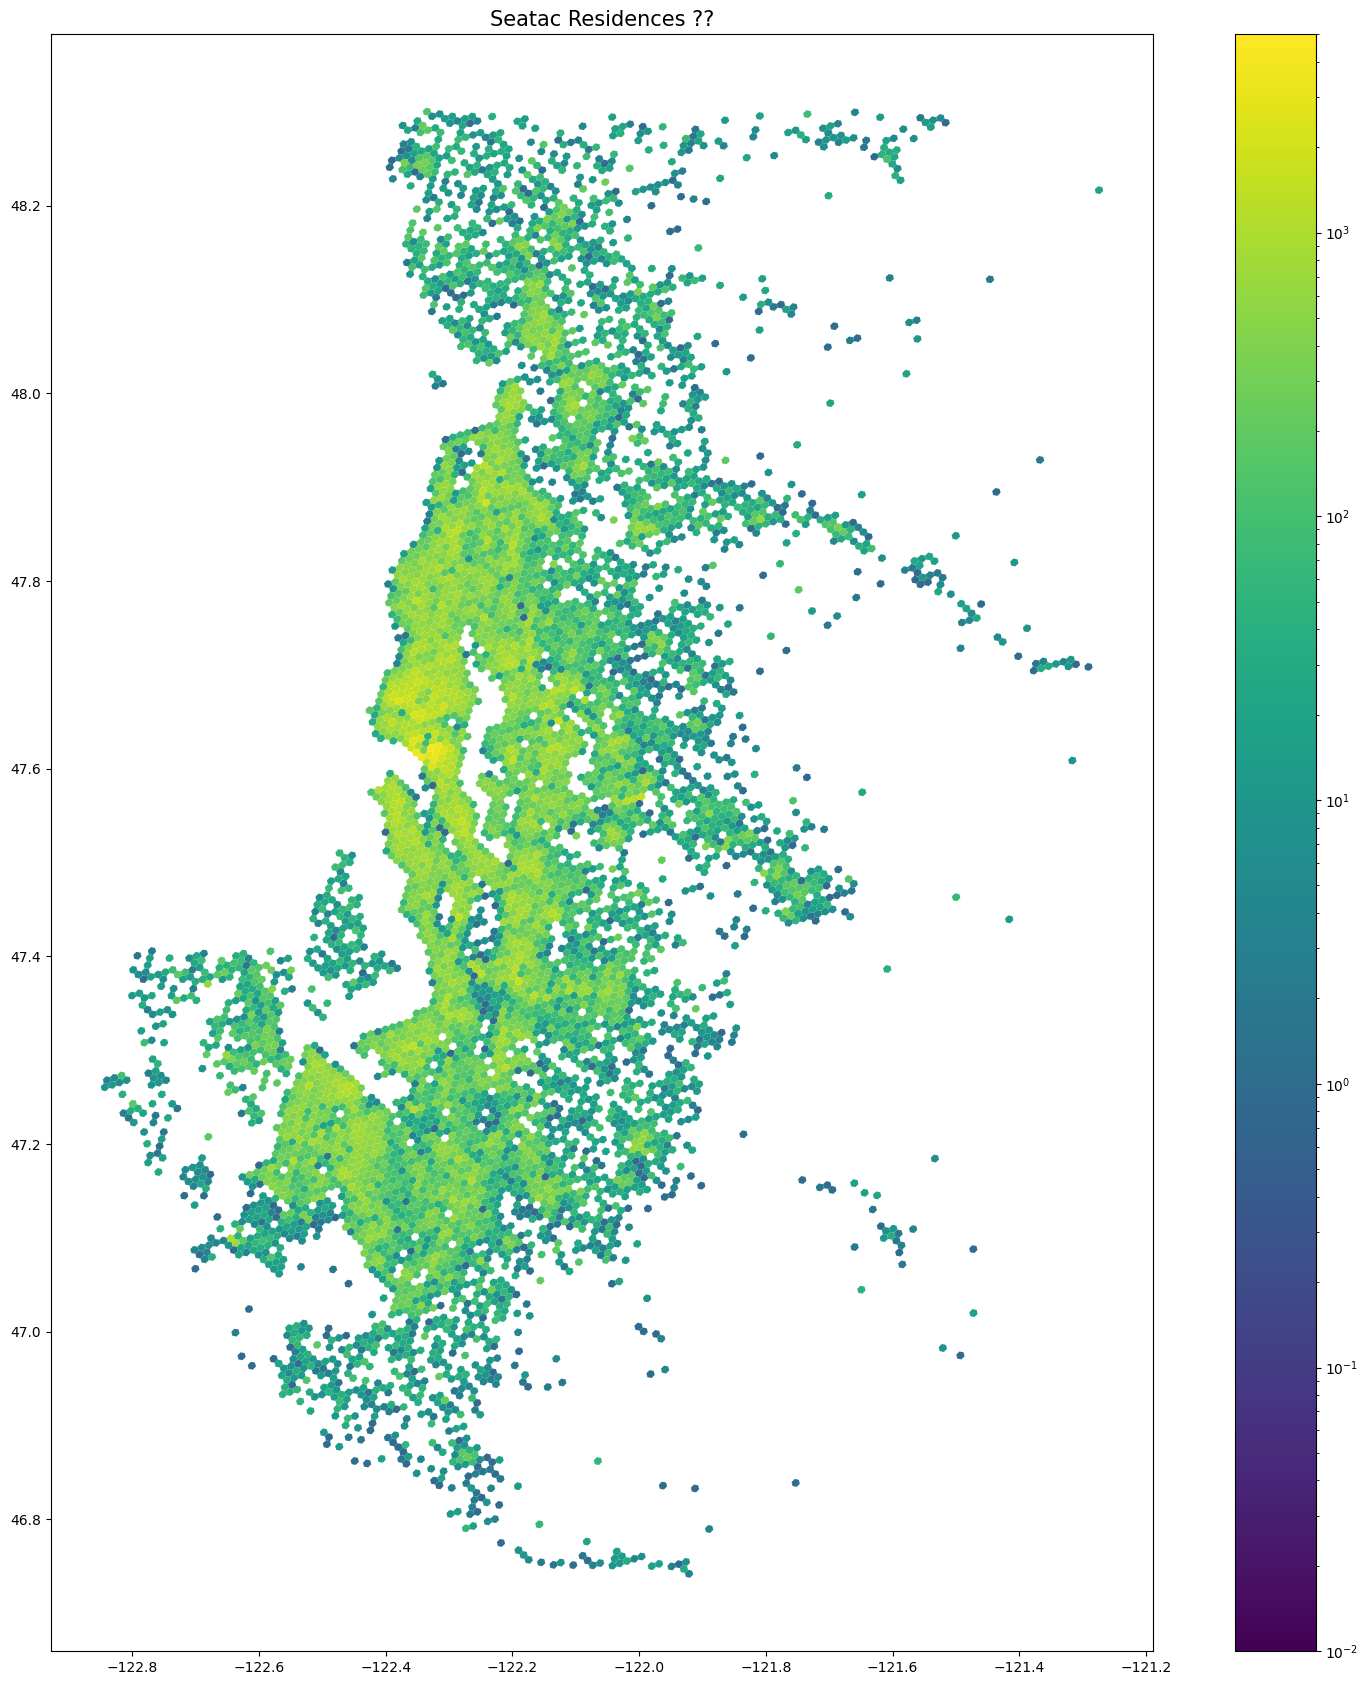

In [13]:
#seatac_residence_hexes.plot(column = 'S000')

fig, ax = matplotlib.pyplot.subplots(figsize  = (21, 21))

seatac_residence_hexes.plot(column = 'S000',
                legend = True,
                norm=plt.colors.LogNorm(vmin = 0.01, vmax = 5000),
                ax = ax)

ax.set_title("Seatac Residences ??", fontsize=15)

Text(0.5, 1.0, 'Seatac Employment by Hex ??')

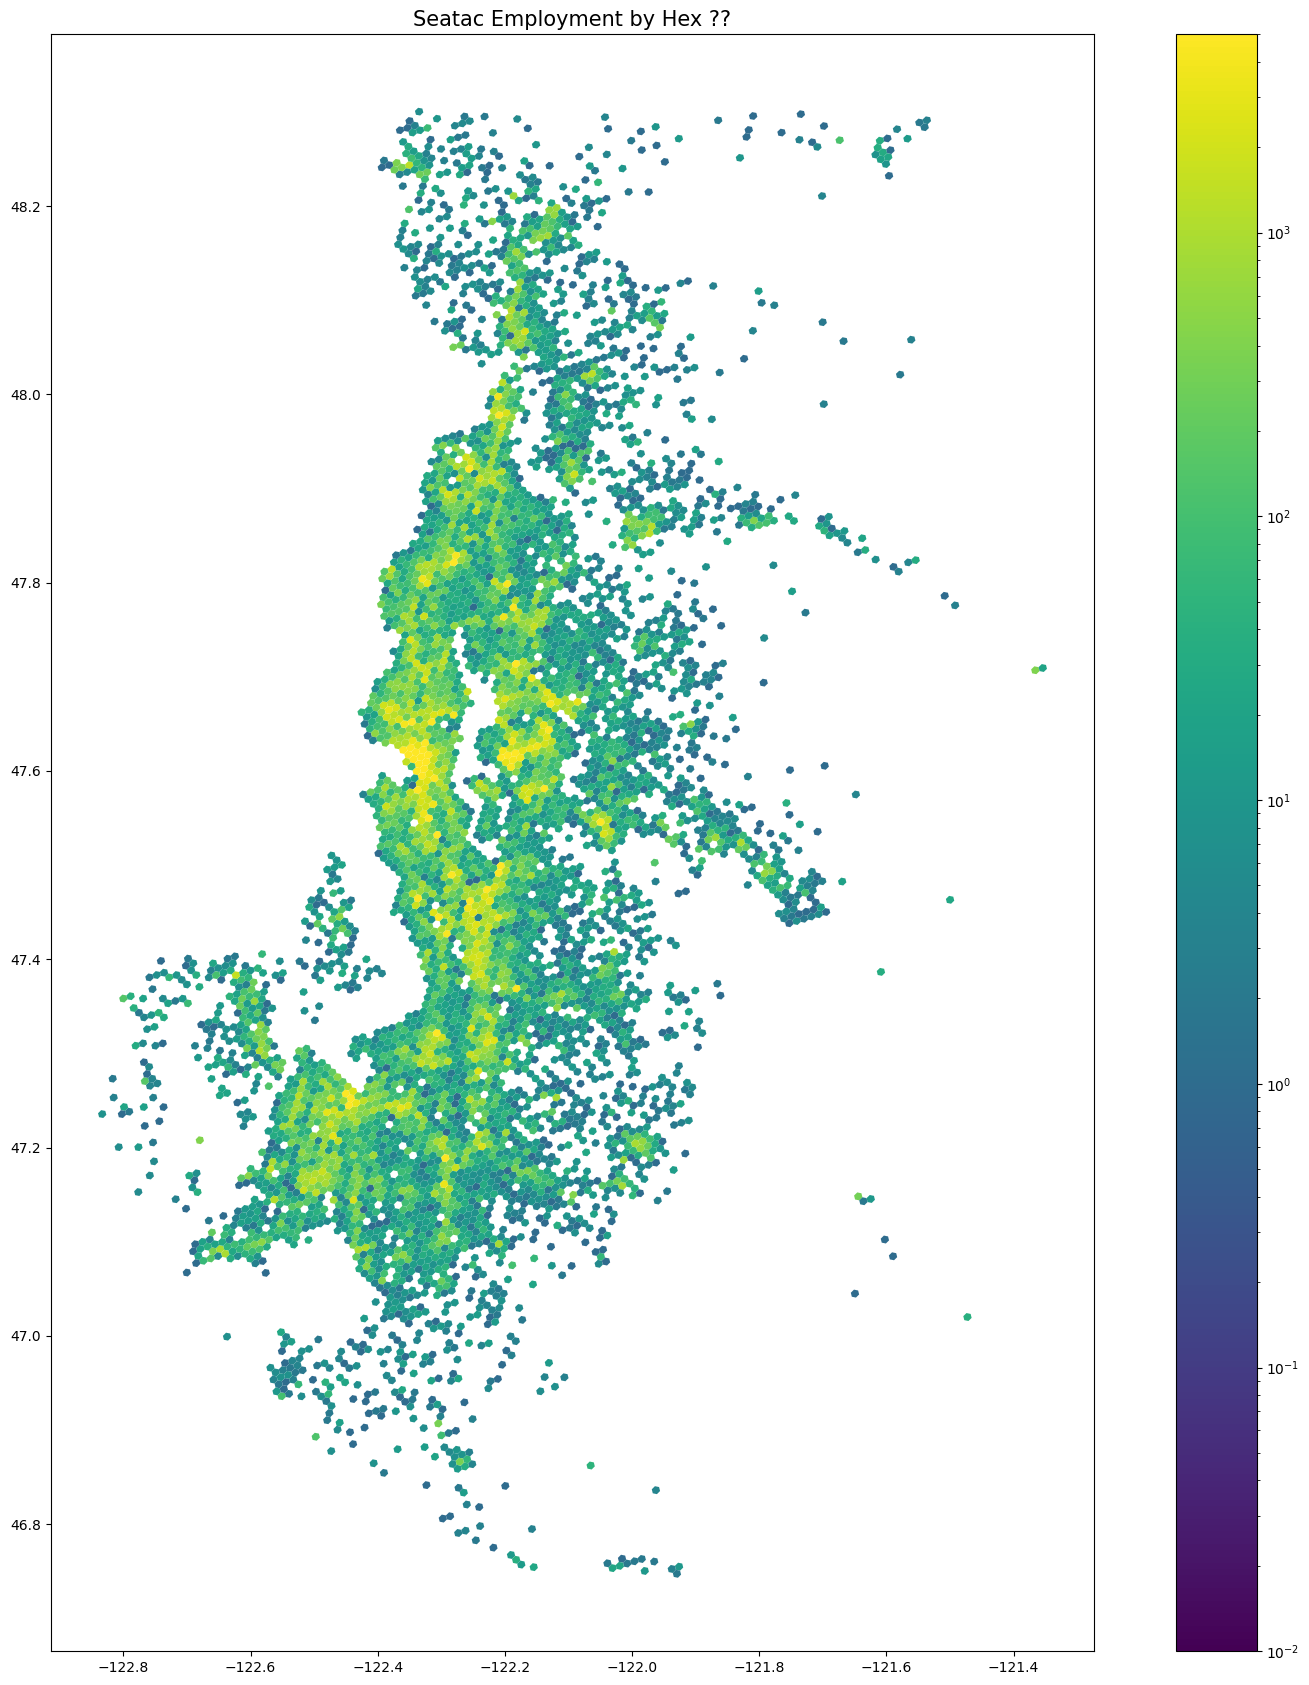

In [14]:
#tt = {'S000'}

#seatac_employment_hexes.plot(column = 'S000')

fig, ax = matplotlib.pyplot.subplots(figsize  = (21, 21))

seatac_employment_hexes.plot(column = 'S000',
                legend = True,
                norm=plt.colors.LogNorm(vmin = 0.01, vmax = 5000),
                ax = ax)

ax.set_title("Seatac Employment by Hex ??", fontsize=15)

In [15]:
#### Ok now I am going to try to make a dataframe for the residences of all seattle workers

#### First make a frame with all the residences in the state of washington

#### Second make a frame keeping only those employed in Seattle

#### Third take the above frame, and get the geometry for all the residences of those people.

In [26]:
comb_df_employment.head()

,tabblk2020,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,cbsa,cbsaname,zcta,zctaname,stplc,stplcname,ctycsub,ctycsubname,stcd116,stcd116name,stsldl,stsldlname,stsldu,stslduname,stschool,stschoolname,stsecon,stseconname,trib,tribname,tsub,tsubname,stanrc,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate_x,geometry,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate_y
0,530330328001007,53,WA,Washington,53033,"King County, WA",53033032800,"328 (King, WA)",530330328001,"1 (Tract 328, King, WA)",42660,"Seattle-Tacoma-Bellevue, WA",98065,98065.0,9999999,NaN,5303393078,"Snoqualmie Valley CCD (King, WA)",5301,WA-01,53005,"State House District 5, WA",53005,"State Senate District 5, WA",5308040,"Snoqualmie Valley School District, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB,47.601273,-121.749076,20231016,POINT (-121.74908 47.60127),530330328001007,530330054023011,1,0,1,0,1,0,0,0,0,1,20230321
1,530630004003005,53,WA,Washington,53063,"Spokane County, WA",53063000400,"4 (Spokane, WA)",530630004003,"3 (Tract 4, Spokane, WA)",44060,"Spokane-Spokane Valley, WA",99208,99208.0,5367000,"Spokane city, WA",5306393200,"Spokane CCD (Spokane, WA)",5305,WA-05,53003,"State House District 3, WA",53003,"State Senate District 3, WA",5308250,"Spokane Public Schools, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000012,12 Spokane WIB,47.714227,-117.411179,20231016,POINT (-117.41118 47.71423),530630004003005,530330222034002,1,1,0,0,0,1,0,0,1,0,20230321
2,530630004003005,53,WA,Washington,53063,"Spokane County, WA",53063000400,"4 (Spokane, WA)",530630004003,"3 (Tract 4, Spokane, WA)",44060,"Spokane-Spokane Valley, WA",99208,99208.0,5367000,"Spokane city, WA",5306393200,"Spokane CCD (Spokane, WA)",5305,WA-05,53003,"State House District 3, WA",53003,"State Senate District 3, WA",5308250,"Spokane Public Schools, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000012,12 Spokane WIB,47.714227,-117.411179,20231016,POINT (-117.41118 47.71423),530630004003005,530350806002017,1,1,0,0,0,1,0,0,1,0,20230321
3,530630004003005,53,WA,Washington,53063,"Spokane County, WA",53063000400,"4 (Spokane, WA)",530630004003,"3 (Tract 4, Spokane, WA)",44060,"Spokane-Spokane Valley, WA",99208,99208.0,5367000,"Spokane city, WA",5306393200,"Spokane CCD (Spokane, WA)",5305,WA-05,53003,"State House District 3, WA",53003,"State Senate District 3, WA",5308250,"Spokane Public Schools, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000012,12 Spokane WIB,47.714227,-117.411179,20231016,POINT (-117.41118 47.71423),530630004003005,530350923004000,1,1,0,0,1,0,0,0,1,0,20230321
4,530630004003005,53,WA,Washington,53063,"Spokane County, WA",53063000400,"4 (Spokane, WA)",530630004003,"3 (Tract 4, Spokane, WA)",44060,"Spokane-Spokane Valley, WA",99208,99208.0,5367000,"Spokane city, WA",5306393200,"Spokane CCD (Spokane, WA)",5305,WA-05,53003,"State House District 3, WA",53003,"State Senate District 3, WA",5308250,"Spokane Public Schools, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000012,12 Spokane WIB,47.714227,-117.411179,20231016,POINT (-117.41118 47.71423),530630004003005,530530714091003,1,0,0,1,1,0,0,0,0,1,20230321


In [29]:
comb_df_employment_not_null = comb_df_employment.dropna(subset=['stplcname'])

seattle_geo_employees_frame = comb_df_employment_not_null[comb_df_employment_not_null['stplcname'].str.startswith('Seattle')]

seattle_geo_employees_frame.tail(2)

,tabblk2020,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,cbsa,cbsaname,zcta,zctaname,stplc,stplcname,ctycsub,ctycsubname,stcd116,stcd116name,stsldl,stsldlname,stsldu,stslduname,stschool,stschoolname,stsecon,stseconname,trib,tribname,tsub,tsubname,stanrc,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate_x,geometry,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate_y
2139706,530330116021001,53,WA,Washington,53033,"King County, WA",53033011602,"116.02 (King, WA)",530330116021,"1 (Tract 116.02, King, WA)",42660,"Seattle-Tacoma-Bellevue, WA",98136,98136.0,5363000,"Seattle city, WA",5303392928,"Seattle CCD (King, WA)",5307,WA-07,53034,"State House District 34, WA",53034,"State Senate District 34, WA",5307710,"Seattle Public Schools, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB,47.539578,-122.384686,20231016,POINT (-122.38469 47.53958),530330116021001,530330286002013,1,0,1,0,0,1,0,0,0,1,20230321
2139707,530330104024016,53,WA,Washington,53033,"King County, WA",53033010402,"104.02 (King, WA)",530330104024,"4 (Tract 104.02, King, WA)",42660,"Seattle-Tacoma-Bellevue, WA",98108,98108.0,5363000,"Seattle city, WA",5303392928,"Seattle CCD (King, WA)",5309,WA-09,53011,"State House District 11, WA",53011,"State Senate District 11, WA",5307710,"Seattle Public Schools, WA",9999999,NaN,99999,NaN,9999999,NaN,9999999,NaN,99999,NaN,NaN,NaN,53000005,05 Seattle/King County WIB,47.555230,-122.314727,20231016,POINT (-122.31473 47.55523),530330104024016,530330041022014,1,1,0,0,1,0,0,1,0,0,20230321


In [34]:
seattle_employment_hexes = seattle_geo_employees_frame.h3.geo_to_h3_aggregate(9)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


<Axes: >

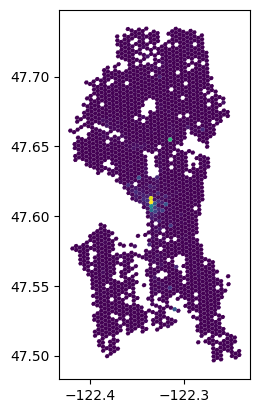

In [35]:
seattle_employment_hexes.plot(column = 'S000')

In [42]:
### Grab just the two relevant columns (residence geolocation and S000)
two_cols = seattle_geo_employees_frame[['h_geocode', 'S000']].copy()

residence_of_seattle_employees_frame = pd.merge(left = gdf_employment, right = two_cols, left_on = 'tabblk2020', right_on = 'h_geocode', how = 'inner')

seattle_employee_residence_hexes = residence_of_seattle_employees_frame.h3.geo_to_h3_aggregate(7)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


In [53]:
seattle_employee_residence_hexes_greater_than = seattle_employee_residence_hexes[seattle_employee_residence_hexes['S000'] > 200]

<Axes: >

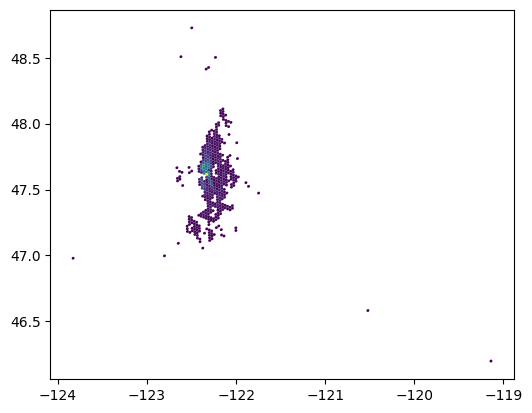

In [54]:
seattle_employee_residence_hexes_greater_than.plot(column = 'S000')